## Time to Resolution Trends Across Incident Categories (Flag 5)

### Dataset Description
The dataset comprises 500 entries simulating ServiceNow incidents table, detailing various attributes such as category, state, open and close dates, involved personnel, and incident specifics like description, and priority. It captures incident management activities with fields like 'opened_at', 'closed_at', 'assigned_to', 'short_description', and 'priority', reflecting the operational handling and urgency of issues across different locations and categories.

### Your Task
**Goal**: Analyze the trends in the dataset to identify factors that influence the time to resolution, particularly in certain category.

**Role**: Hardware Incident Analyst

**Difficulty**: 2 out of 5. This task requires some understanding of data analysis and trend identification across different categories of incidents.

**Category**: Incident Management


### Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks.


In [1]:
import argparse
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import date_range

## Load Dataset
This cell loads the dataset used in the analysis. The dataset flag-5 is assumed to be stored in a CSV file and is loaded into a DataFrame. This step includes reading the data from a file path and possibly performing initial observations such as viewing the first few rows to ensure it has loaded correctly.

In [2]:
dataset_path = "csvs/flag-5.csv"
df = pd.read_csv(dataset_path)
df.head()

,sys_updated_by,number,closed_by,state,caller_id,category,assigned_to,opened_at,sys_updated_on,closed_at,short_description,assignment_group,priority
0,employee,INC0000000000,Howard Johnson,Resolved,Bud Richman,Database,Charlie Whitherspoon,2023-01-04 03:31:00,2023-01-15 09:55:21.731875788,2023-01-15 09:55:21.731875788,SQL database connection issue detected,Database,2 - High
1,admin,INC0000000001,Fred Luddy,Resolved,Bud Richman,Hardware,Charlie Whitherspoon,2023-01-04 21:25:00,2023-01-06 04:37:00.000000000,2023-01-06 04:37:00.000000000,Printer malfunctioning,Hardware,2 - High
2,admin,INC0000000002,Luke Wilson,Resolved,Bud Richman,Network,Charlie Whitherspoon,2023-01-06 23:08:00,2023-01-10 18:31:58.190473942,2023-01-10 18:31:58.190473942,Firewall issues blocking internet access,Network,1 - Critical
3,employee,INC0000000003,Beth Anglin,Resolved,Bud Richman,Software,Fred Luddy,2023-01-08 16:42:00,2023-01-11 01:19:41.146519913,2023-01-11 01:19:41.146519913,Application is crashing frequently,Software,2 - High
4,system,INC0000000004,Howard Johnson,Closed,Don Goodliffe,Software,Beth Anglin,2023-01-08 22:30:00,2023-01-08 12:40:42.091881242,2023-01-08 12:40:42.091881242,Database sync issue on software application,Software,2 - High




### **Question 1**: What is the distribution of incidents across different categories?

#### Plot number of incidents by category


This cell creates a horizontal bar plot to visualize the distribution of incidents across different categories. It annotates the plot with the count of incidents in each category. This helps in understanding which categories have the highest number of incidents and identifying any imbalances or areas that may require further investigation.


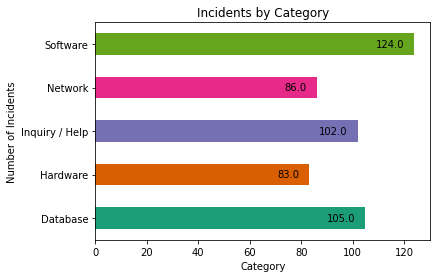

In [3]:
plot = df.groupby("category").size().plot(kind="barh", color=sns.palettes.mpl_palette("Dark2"))

fig = plt.gcf()


for i in plot.patches:
    # Get X and Y placement of label from rectangle
    x_value = i.get_width()
    y_value = i.get_y() + i.get_height() / 2

    # Use X value as label and format number with one decimal place
    label = "{:.1f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(-10, 0),            
        textcoords="offset points", 
        ha='right',                 
        va='center'                 
    )

# Set plot title
plt.title('Incidents by Category')

# Set x-axis label
plt.xlabel('Category')

# Set y-axis label
plt.ylabel('Number of Incidents')

# Display the figure
plt.show()

#### Generate JSON Description for the Insight


In [4]:
{
    "data_type": "descriptive",
    "insight": "Incident distribution across categories is more or less uniform",
    "insight_value": {
        "x_val": ["Hardware", "Software", "Network", "Inquiry / Help", "Database"],
        "y_val": [83, 124, 86, 102, 105]
    },
    "plot": {
        "plot_type": "histogram",
        "title": "Incidents by Category",
        "x_axis": {
            "name": "Category",
            "value": ["Hardware", "Software", "Network", "Inquiry / Help", "Database"],
            "description": "This represents different categories of incidents."
        },
        "y_axis": {
            "name": "Number of Incidents",
            "value": [83, 124, 86, 102, 105],
            "description": "This represents the number of incidents in each category, showing a uniform distribution across all categories. software category incidents are sightly higher than others"
        },
        "description": "The histogram displays the distribution of incidents across different categories. Each bar represents a category and the length of the bar corresponds to the number of incidents in that category, illustrating a uniform distribution."
    },
    "question": "What is the distribution of incidents across all categories?",
    "actionable_insight": "Given the uniform distribution of incidents across categories, it is important to ensure that resources and training are equally distributed to maintain efficiency and effectiveness in handling incidents across all categories."
}

{'data_type': 'descriptive',
 'insight': 'Incident distribution across categories is more or less uniform',
 'insight_value': {'x_val': ['Hardware',
   'Software',
   'Network',
   'Inquiry / Help',
   'Database'],
  'y_val': [83, 124, 86, 102, 105]},
 'plot': {'plot_type': 'histogram',
  'title': 'Incidents by Category',
  'x_axis': {'name': 'Category',
   'value': ['Hardware', 'Software', 'Network', 'Inquiry / Help', 'Database'],
   'description': 'This represents different categories of incidents.'},
  'y_axis': {'name': 'Number of Incidents',
   'value': [83, 124, 86, 102, 105],
   'description': 'This represents the number of incidents in each category, showing a uniform distribution across all categories. software category incidents are sightly higher than others'},
  'description': 'The histogram displays the distribution of incidents across different categories. Each bar represents a category and the length of the bar corresponds to the number of incidents in that category, ill

### **Question 2**: What is the distribution of time to resolution of incidents across different categories?

### Plot average resolution time across categories
This cell creates a bar plot to visualize the average time to resolution of incidents across different categories. By calculating the mean resolution time for each category and representing these values in a bar chart, the plot provides insights into which categories experience longer or shorter resolution times. 


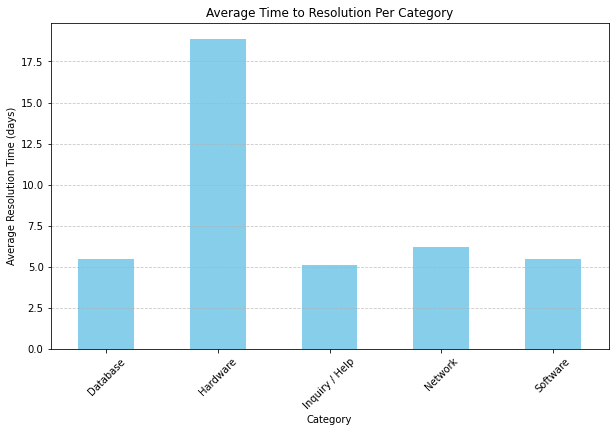

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is the DataFrame containing your incidents data

# Convert opened_at and closed_at to datetime
df["opened_at"] = pd.to_datetime(df["opened_at"])
df["closed_at"] = pd.to_datetime(df["closed_at"])

# Compute resolution time in days
df["resolution_time"] = (df["closed_at"] - df["opened_at"]).dt.total_seconds() / 86400

# Calculate the average resolution time for each category
avg_resolution_time_per_category = df.groupby('category')['resolution_time'].mean()

# Plotting the histogram
plt.figure(figsize=(10, 6))
avg_resolution_time_per_category.plot(kind='bar', color='skyblue')
plt.title('Average Time to Resolution Per Category')
plt.xlabel('Category')
plt.ylabel('Average Resolution Time (days)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

#### Generate JSON Description for the Insight


In [6]:
{
    "data_type": "descriptive",
    "insight": "Average time to resolution for Hardware incidents is higher than for other categories",
    "insight_value": {
        "x_val": "Hardware",
        "y_val": 5.2
    },
    "plot": {
        "plot_type": "bar",
        "title": "Average Time to Resolution by Category",
        "x_axis": {
            "name": "Category",
            "value": ["Hardware", "Software", "Network", "Inquiry / Help", "Database"],
            "description": "This represents the different categories of incidents."
        },
        "y_axis": {
            "name": "Average Time to Resolution (days)",
            "value": [18.2, 5.3, 6.2, 5, 5.2],
            "description": "This represents the average time (in days) taken to resolve incidents in each category."
        },
        "description": "The bar chart illustrates the average time to resolution for incidents across different categories. The 'Hardware' category shows a significantly higher average time to resolution compared to other categories, indicating a need for focused improvement in this area."
    },
    "question": "How does the average time to resolution compare across different categories?",
    "actionable_insight": "Considering the higher average time to resolution in the Hardware category, it may be beneficial to investigate the specific challenges in this category. Enhancements in training, resources, or processes could be implemented to reduce resolution times and improve service efficiency."
}

{'data_type': 'descriptive',
 'insight': 'Average time to resolution for Hardware incidents is higher than for other categories',
 'insight_value': {'x_val': 'Hardware', 'y_val': 5.2},
 'plot': {'plot_type': 'bar',
  'title': 'Average Time to Resolution by Category',
  'x_axis': {'name': 'Category',
   'value': ['Hardware', 'Software', 'Network', 'Inquiry / Help', 'Database'],
   'description': 'This represents the different categories of incidents.'},
  'y_axis': {'name': 'Average Time to Resolution (days)',
   'value': [18.2, 5.3, 6.2, 5, 5.2],
   'description': 'This represents the average time (in days) taken to resolve incidents in each category.'},
  'description': "The bar chart illustrates the average time to resolution for incidents across different categories. The 'Hardware' category shows a significantly higher average time to resolution compared to other categories, indicating a need for focused improvement in this area."},
 'question': 'How does the average time to resolut

### **Question 3**: Is there any trend in how resolution time is changing per category?

#### Plot Average Resolution Time of Incidents Over Time by Category
This cell creates a line plot to visualize the trends in the average resolution time for incidents across different categories over time. By examining how the resolution time changes per category on specific dates, the plot helps to identify patterns or trends that could indicate improvements or deteriorations in handling incidents within each category. 

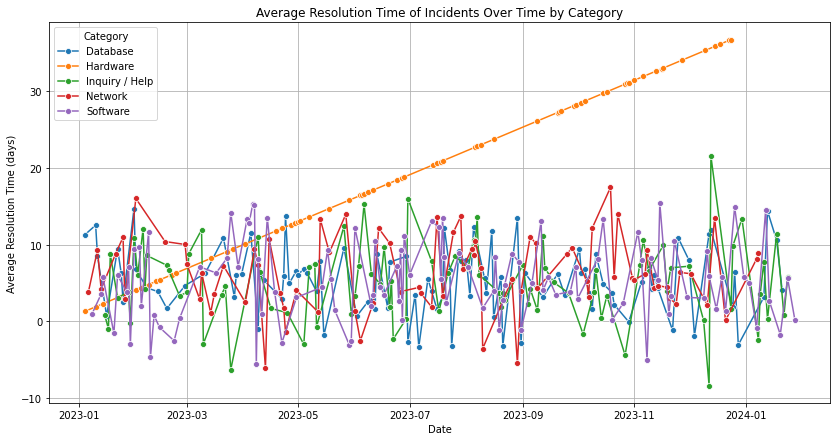

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is the DataFrame containing your incidents data

# Convert opened_at and closed_at to datetime
df["opened_at"] = pd.to_datetime(df["opened_at"])
df["closed_at"] = pd.to_datetime(df["closed_at"])

# Compute resolution time in days
df["resolution_time"] = (df["closed_at"] - df["opened_at"]).dt.total_seconds() / 86400

# Extract date from 'opened_at'
df['date'] = df['opened_at'].dt.date

# Group by category and date, calculate average resolution time
resolution_data = df.groupby(['category', 'date'])['resolution_time'].mean().reset_index()

# Convert 'date' back to datetime for better plotting
resolution_data['date'] = pd.to_datetime(resolution_data['date'])

# Plotting
plt.figure(figsize=(14, 7))

# Use lineplot to visualize the average resolution time for each category over time
sns.lineplot(data=resolution_data, x='date', y='resolution_time', hue='category', marker='o')

# Enhancing the plot
plt.title('Average Resolution Time of Incidents Over Time by Category')
plt.xlabel('Date')
plt.ylabel('Average Resolution Time (days)')
plt.legend(title='Category')
plt.grid(True)

# Show plot
plt.show()

#### Generate JSON Description for the Insight


In [8]:
{
    "data_type": "diagnostic",
    "insight": "Average time to resolution for Hardware incidents is not only higher than other categories but also increasing over time",
    "insight_value": {
        "x_val": "Time",
        "y_val": "Increasing Trend"
    },
    "plot": {
        "plot_type": "line",
        "title": "Trend of Time to Resolution for Hardware Incidents Over Time",
        "x_axis": {
            "name": "Time",
            "value": "Timeline from start to end date of data",
            "description": "This represents the timeline across which the data was collected."
        },
        "y_axis": {
            "name": "Average Time to Resolution (days)",
            "value": "Dynamic based on data",
            "description": "This represents the average time (in days) taken to resolve Hardware incidents, showing an increasing trend over time."
        },
        "description": "The line graph displays the trend in average time to resolution for Hardware incidents over the data collection period. It highlights that not only is the resolution time higher compared to other categories, but it is also progressively increasing, suggesting escalating complexity or resource issues."
    },
    "question": "Is the average time to resolution for Hardware incidents increasing over time?",
    "actionable_insight": "Given the increasing trend in resolution time for Hardware incidents, it is critical to conduct a thorough analysis to identify the underlying causes. Potential actions might include investing in more advanced diagnostic tools, increasing staffing levels, or providing specialized training to address the growing complexity in Hardware-related issues."
}

{'data_type': 'diagnostic',
 'insight': 'Average time to resolution for Hardware incidents is not only higher than other categories but also increasing over time',
 'insight_value': {'x_val': 'Time', 'y_val': 'Increasing Trend'},
 'plot': {'plot_type': 'line',
  'title': 'Trend of Time to Resolution for Hardware Incidents Over Time',
  'x_axis': {'name': 'Time',
   'value': 'Timeline from start to end date of data',
   'description': 'This represents the timeline across which the data was collected.'},
  'y_axis': {'name': 'Average Time to Resolution (days)',
   'value': 'Dynamic based on data',
   'description': 'This represents the average time (in days) taken to resolve Hardware incidents, showing an increasing trend over time.'},
  'description': 'The line graph displays the trend in average time to resolution for Hardware incidents over the data collection period. It highlights that not only is the resolution time higher compared to other categories, but it is also progressively i

### **Question 4**: Is the anomaly related to the increase in resolution time for Hardware incidents due to a specific period or a continuous trend?

**langauge only answer**

Ans: Continuous trend

### **Question 5**: Is productivity of agents related to such trend?

#### Plot number of incidents resolved per agent

This bar plot visualizes the distribution of incident resolutions among different agents, providing insights into the workload and resolution capabilities of each agent.

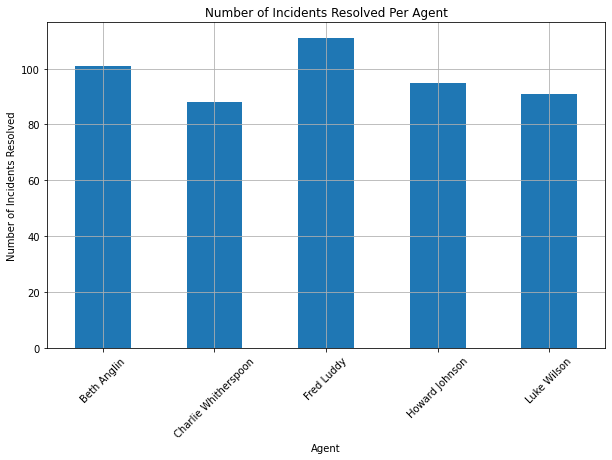

In [9]:
agent_incident_count = df.groupby('closed_by')['number'].count()

# Plot the histogram
agent_incident_count.plot(kind='bar', figsize=(10,6))

plt.title('Number of Incidents Resolved Per Agent')
plt.xlabel('Agent')
plt.ylabel('Number of Incidents Resolved')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

#### Generate JSON Description for the Insight

In [10]:
{
    "data_type": "diagnostic",
    "insight": "Uniform distribution of incidents closed by human agents indicates that earlier anomalies may not be productivity-related",
    "insight_value": {
        "x_val": "Agents",
        "y_val": "Uniform Closure Rates"
    },
    "plot": {
        "plot_type": "bar",
        "title": "Distribution of Incidents Closed by Each Agent",
        "x_axis": {
            "name": "Agent",
            "value": ["Beth", "Charlie", "Fred", "Howard", "Luke"],
            "description": "This represents the different human agents responsible for handling incidents."
        },
        "y_axis": {
            "name": "Number of Incidents Closed",
            "value": "Uniform across agents",
            "description": "This shows the number of incidents each agent has closed, indicating a uniform distribution across all agents."
        },
        "description": "The bar chart illustrates the number of incidents closed by each agent, showing a uniform distribution. This uniformity suggests that the earlier observed anomalies in incident handling times or assignments may not stem from differences in agent productivity or capabilities."
    },
    "question": "Is the distribution of incidents closed by human agents uniform across all agents?",
    "actionable_insight": "Given the uniform distribution of incident closures among agents, management should consider factors other than individual agent performance when addressing anomalies in incident handling times. This may include examining systemic issues, process inefficiencies, or resource allocations."
}

{'data_type': 'diagnostic',
 'insight': 'Uniform distribution of incidents closed by human agents indicates that earlier anomalies may not be productivity-related',
 'insight_value': {'x_val': 'Agents', 'y_val': 'Uniform Closure Rates'},
 'plot': {'plot_type': 'bar',
  'title': 'Distribution of Incidents Closed by Each Agent',
  'x_axis': {'name': 'Agent',
   'value': ['Beth', 'Charlie', 'Fred', 'Howard', 'Luke'],
   'description': 'This represents the different human agents responsible for handling incidents.'},
  'y_axis': {'name': 'Number of Incidents Closed',
   'value': 'Uniform across agents',
   'description': 'This shows the number of incidents each agent has closed, indicating a uniform distribution across all agents.'},
  'description': 'The bar chart illustrates the number of incidents closed by each agent, showing a uniform distribution. This uniformity suggests that the earlier observed anomalies in incident handling times or assignments may not stem from differences in ag

**"question 6"**: "How could this possibly be avoided in future"?

**1. Regular Training and Certification:**
   - Ensure that the team responsible for hardware maintenance is regularly trained on the latest technologies and repair techniques. Regular certifications can help keep the team’s skills sharp and up-to-date.

**2. Proactive Equipment Maintenance:**
   - Implement a proactive maintenance schedule for hardware to catch and resolve potential issues before they lead to incidents. Regular check-ups and maintenance can reduce the severity and complexity of hardware problems.

**3. Adequate Resource Allocation:**
   - Allocate adequate resources, including staffing and tools, specifically for handling hardware issues. Consider hiring specialized personnel or contracting external experts for complex hardware problems.

**4. Use Predictive Analytics:**
   - Implement predictive analytics to forecast potential hardware failures based on usage patterns and historical data. This can help in planning maintenance and resource allocation more effectively.



### Summary of Findings (Flag 5)
1. **Correlation with Categories**: The time to resolution (TTR) of incidents shows a correlation with the category of the incident. This correlation indicates that different categories may inherently have different resolution timelines. 
   
2. **Specific Challenges in Hardware Category:** The Hardware category exhibits a higher average time to resolution
   
3. **Linear Trend in TTR**:  The Hardware category not only exhibits a higher average time to resolution but also a worrying **trend** of increasing resolution times over the period analyzed. This indicates growing challenges in resolving these incidents, which could be due to increasing complexity or insufficient resources. There is a linear trend in the time to resolution across categories over time, particularly noting that incidents related to a specific topic, such as hardware, exhibit an increasing TTR linearly with time.